In [26]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [57]:
def plotFace(row, fname, action, minMaxX, minMaxY):
    plt.clf()
    plt.scatter(row['X_feature_1':'X_feature_49'], row['Y_feature_1':'Y_feature_49'])
    name = fname+'_'+action
    plt.xlim(xmin=minMaxX[0],xmax=minMaxX[1])
    plt.ylim(ymin=minMaxY[0],ymax=minMaxY[1])
    plt.gca().invert_yaxis()
    plt.savefig(name+'.jpg')

In [58]:
def conv_ms_s(ms):
    return ms/1000

S1_
S1_Forest_20160614_040406
S1_Kites_20160614_044038
S1_Neutral_20160614_041414
S1_Rotch_20160614_042304
S1_Shibuja_20160614_043151
S1_Silverman_20160614_040302
S2_
S2_Forest_20160614_060606
S2_Kites_20160614_055640
S2_Neutral_20160614_064042
S2_Rotch_20160614_062334
S2_Shibuja_20160614_063212
S2_Silverman_20160614_055040
S2_Sunset_20160614_061501
S3_
S3_Forest_20160615_022748
S3_Kites_20160615_025333
S3_Neutral_20160615_023618
S3_Rotch_20160615_021903
S3_Shibuja_20160615_024449
S3_Silverman_20160615_020409
S3_Sunset_20160615_020930
S4_
S4_Forest_20160615_041137
S4_Kites_20160615_040240
S4_Neutral_20160615_035346
S4_Rotch_20160615_042852
S4_Shibuja_20160615_034440
S4_Silverman_20160615_033452
S4_Sunset_20160615_042010
S5_
S5_Forest_20160616_111157
S5_Kites_20160616_104256
S5_Neutral_20160616_112151
S5_Rotch_20160616_103307
S5_Shibuja_20160616_110226
S5_Silverman_20160616_102541
S5_Sunset_20160616_105302
S6_
S6_Forest_20160616_022616
S6_Kites_20160616_021656
S6_Neutral_20160616_023509

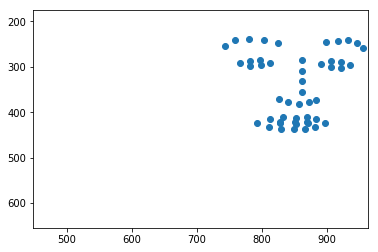

In [64]:
subjects = ['S1_', 'S2_', 'S3_', 'S4_', 'S5_', 'S6_', 'S8_', 'S9_', 'S11_', 'S12_', 'S13_']
start_times = [30, 90, 270, 450, 480]
test_names = ['sceneIntro', 'stressTest', 'break', 'neckerTest', 'survey']
for subject in subjects:
    tests_folder = [name for name in os.listdir(".") if (os.path.isdir(name) and subject in name)]
    print(subject)
    for test in tests_folder:
        fname_prefix = subject+test.split('_')[1]
        print(test)
        intra_file = [file for file in os.listdir("./"+test) if "INTRA" in file]
        if intra_file != []:
            minX= file.loc[:,'X_feature_1':'X_feature_49'].min().min()
            maxX= file.loc[:,'X_feature_1':'X_feature_49'].max().max()
            minY= file.loc[:,'Y_feature_1':'Y_feature_49'].min().min()
            maxY= file.loc[:,'Y_feature_1':'Y_feature_49'].max().max()
            file = pd.read_csv("./"+test+"/"+intra_file[0])
            initTime = file.loc[0]['timestamp']
            plotFace(file.loc[0], fname_prefix, 'neutralIntro', (minX,maxX), (minY,maxY))
            for time in start_times:
                row_num = 0
                while row_num < file.shape[0]-1 and conv_ms_s(file.loc[row_num]['timestamp']-initTime) < time:
                    row_num += 1
                plotFace(file.loc[row_num], fname_prefix, test_names[start_times.index(time)], (minX,maxX), (minY,maxY))
                    